## Libraries

In [1]:
import pandas as pd
import random
import operator

## Data Frame extraction

In [2]:
df = pd.read_csv("G:/My Projects/If_it_fits_your_maccies/menu.csv")

In [3]:
df.shape

(260, 24)

In [4]:
df.shape[0]

260

In [5]:
menusize = df.shape[0]

In [6]:
menusize

260

In [7]:
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [8]:
df_macro = df[["Item", "Total Fat", "Carbohydrates", "Protein"]]

In [9]:
item_list = df_macro["Item"].tolist()
fats = df_macro["Total Fat"].tolist()
carbs = df_macro["Carbohydrates"].tolist()
prot = df_macro["Protein"].tolist()

In [10]:
type(fats[1])

float

In [35]:
def fitness(gene, target):
    total_carbs = 0.0
    total_fats = 0.0
    total_protein = 0.0
    index = 0
    for i in gene:
        
        total_carbs += (i * carbs[i])
        total_fats += (i * fats[i])
        total_protein += (i * prot[i])
        index += 1
    score = ((target[0] - total_carbs)**2 +
            (target[1] - total_fats)**2 +
            (target[2] - total_protein)**2)
    return score

### Fitness

## initial pop

In [12]:
def generateChild(chromNumber):
    gene = []
    for i in range(chromNumber):
        chrom = random.randint(0,5)
        gene.append(chrom)
    return gene



In [13]:
def generatePop(popSize, chromSize):
    population = []
    i = 0
    while i < popSize:
        population.append(generateChild(chromSize))
        i+=1
    #population.pop(len(population))
    print(population)
    return population

In [14]:
generatePop(100, 10)

[[0, 5, 5, 3, 1, 4, 4, 5, 4, 0], [0, 3, 4, 2, 5, 3, 4, 4, 5, 2], [4, 4, 4, 0, 2, 4, 3, 1, 0, 3], [2, 4, 3, 4, 4, 2, 4, 3, 3, 1], [1, 2, 4, 5, 1, 5, 0, 1, 5, 0], [3, 2, 2, 2, 5, 2, 4, 2, 3, 5], [4, 0, 3, 0, 2, 1, 0, 2, 0, 3], [5, 2, 4, 0, 5, 5, 2, 1, 5, 1], [2, 3, 0, 3, 4, 1, 2, 5, 1, 2], [2, 4, 4, 2, 3, 0, 4, 3, 4, 0], [3, 1, 2, 2, 2, 5, 3, 5, 4, 0], [5, 5, 3, 0, 2, 3, 2, 1, 3, 0], [4, 4, 5, 5, 0, 0, 1, 3, 3, 4], [1, 0, 0, 1, 5, 2, 2, 4, 0, 4], [1, 0, 4, 5, 2, 3, 4, 3, 3, 3], [4, 1, 5, 4, 3, 4, 4, 5, 1, 4], [0, 2, 0, 0, 5, 2, 1, 3, 5, 5], [2, 4, 4, 0, 0, 1, 5, 2, 5, 2], [0, 3, 3, 2, 2, 1, 2, 5, 0, 5], [0, 2, 1, 2, 5, 4, 1, 5, 3, 2], [4, 2, 4, 4, 4, 3, 4, 5, 4, 1], [4, 4, 2, 3, 0, 3, 0, 5, 3, 5], [5, 3, 2, 1, 1, 0, 5, 3, 2, 0], [2, 0, 1, 4, 2, 0, 2, 3, 4, 0], [0, 1, 4, 5, 5, 3, 3, 4, 2, 2], [5, 1, 5, 4, 1, 1, 0, 4, 3, 4], [3, 4, 2, 3, 4, 0, 1, 0, 4, 1], [0, 5, 5, 1, 5, 1, 5, 2, 5, 5], [4, 0, 4, 3, 3, 2, 2, 3, 3, 0], [1, 0, 1, 5, 4, 3, 1, 2, 5, 3], [2, 3, 3, 0, 3, 2, 0, 5, 1, 5], [3, 1, 

[[0, 5, 5, 3, 1, 4, 4, 5, 4, 0],
 [0, 3, 4, 2, 5, 3, 4, 4, 5, 2],
 [4, 4, 4, 0, 2, 4, 3, 1, 0, 3],
 [2, 4, 3, 4, 4, 2, 4, 3, 3, 1],
 [1, 2, 4, 5, 1, 5, 0, 1, 5, 0],
 [3, 2, 2, 2, 5, 2, 4, 2, 3, 5],
 [4, 0, 3, 0, 2, 1, 0, 2, 0, 3],
 [5, 2, 4, 0, 5, 5, 2, 1, 5, 1],
 [2, 3, 0, 3, 4, 1, 2, 5, 1, 2],
 [2, 4, 4, 2, 3, 0, 4, 3, 4, 0],
 [3, 1, 2, 2, 2, 5, 3, 5, 4, 0],
 [5, 5, 3, 0, 2, 3, 2, 1, 3, 0],
 [4, 4, 5, 5, 0, 0, 1, 3, 3, 4],
 [1, 0, 0, 1, 5, 2, 2, 4, 0, 4],
 [1, 0, 4, 5, 2, 3, 4, 3, 3, 3],
 [4, 1, 5, 4, 3, 4, 4, 5, 1, 4],
 [0, 2, 0, 0, 5, 2, 1, 3, 5, 5],
 [2, 4, 4, 0, 0, 1, 5, 2, 5, 2],
 [0, 3, 3, 2, 2, 1, 2, 5, 0, 5],
 [0, 2, 1, 2, 5, 4, 1, 5, 3, 2],
 [4, 2, 4, 4, 4, 3, 4, 5, 4, 1],
 [4, 4, 2, 3, 0, 3, 0, 5, 3, 5],
 [5, 3, 2, 1, 1, 0, 5, 3, 2, 0],
 [2, 0, 1, 4, 2, 0, 2, 3, 4, 0],
 [0, 1, 4, 5, 5, 3, 3, 4, 2, 2],
 [5, 1, 5, 4, 1, 1, 0, 4, 3, 4],
 [3, 4, 2, 3, 4, 0, 1, 0, 4, 1],
 [0, 5, 5, 1, 5, 1, 5, 2, 5, 5],
 [4, 0, 4, 3, 3, 2, 2, 3, 3, 0],
 [1, 0, 1, 5, 4, 3, 1, 2, 5, 3],
 [2, 3, 3,

## Performance of Genes

In [15]:
def computePerfPopulation(population):
    populationPerf = {}
    for gene in population:
        gName = str(gene)
        populationPerf[gName] = fitness(gene, tarNut)
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse = False)

## Selecting Genes

In [16]:
def selectFromPopulation(sPop, best_sample, lucky_few):
    nextGeneration = []    
    for i in range(best_sample):
        nextGeneration.append(sPop[i][0])
    for i in range(lucky_few):
        nextGeneration.append(random.choice(sPop)[0])
        random.shuffle(nextGeneration)
    return nextGeneration

In [17]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

## asdasd

In [18]:
def createChild(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        if(int(100*random.random()) < 50):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

In [19]:
def createChildren(breeders, number_of_child):
    nextPopulation = []
    for i in range(int(len(breeders)/2)):
        for j in range(number_of_child):
            nextPopulation.append(createChild(breeders[i],breeders[len(breeders) -1 -i]))
    return nextPopulation

## mutation

In [20]:
def mutate(gene):
    index_mod = random.randint(0, len(menusize) - 1)
    gene[index_mod] = random.randint(0,5)
    return gene


In [21]:
def mutatePopulation(population, chance_of_mutation):
    for i  in range(len(population)):
        if random.random()*100 < chance_of_mutation:
            population[i] = mutate(population[i])
        return population

# Creating Multiple Generations

In [22]:
def nextGeneration(firstGeneration, best_sample, lucky_few, number_of_child, chance_of_mutation):
    populationSorted = computePerfPopulation(firstGeneration)
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    destringBreeders = betterDestring(nextBreeders)
    nextPopulation = createChildren(destringBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGeneration

In [23]:
def multipleGeneration(number_of_generation, popSize, chromsize, best_sample, lucky_few, number_of_child, chance_of_mutation):
    historic = []
    historicBest = []
    initialpop = generatePop(popSize, chromsize)
    historic.append(initialpop)
    historicBest.append(getBestIndividualFromPopulation(initialpop))
    for i in range (number_of_generation):
        historic.append(nextGeneration(historic[i], best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic

In [24]:
tarNut = [300, 80, 160]

In [36]:
y = multipleGeneration(100, 1000, menusize, 200, 50, 8, 0.1)

[[4, 2, 2, 3, 0, 2, 5, 4, 5, 1, 2, 3, 4, 3, 2, 1, 1, 3, 4, 1, 5, 3, 0, 3, 0, 1, 4, 1, 1, 1, 2, 4, 4, 0, 3, 3, 5, 3, 3, 3, 3, 0, 3, 0, 4, 5, 1, 4, 0, 5, 1, 5, 5, 1, 2, 5, 3, 4, 5, 3, 1, 2, 5, 5, 2, 0, 4, 1, 4, 4, 5, 1, 3, 4, 5, 0, 4, 2, 1, 1, 3, 2, 4, 1, 2, 0, 1, 1, 0, 4, 5, 2, 1, 0, 4, 3, 0, 0, 4, 4, 4, 2, 3, 0, 1, 2, 1, 3, 3, 1, 5, 3, 4, 3, 2, 5, 3, 3, 3, 0, 4, 1, 4, 2, 0, 2, 2, 5, 4, 5, 0, 1, 2, 0, 0, 5, 0, 2, 0, 5, 0, 4, 3, 0, 1, 5, 1, 5, 4, 4, 5, 1, 2, 1, 0, 1, 0, 0, 1, 2, 5, 2, 2, 3, 1, 1, 2, 1, 0, 1, 4, 1, 4, 4, 3, 5, 0, 1, 5, 4, 0, 4, 1, 2, 5, 4, 5, 1, 3, 5, 2, 1, 3, 3, 4, 0, 1, 2, 3, 1, 3, 3, 2, 2, 5, 4, 0, 0, 2, 0, 1, 1, 4, 5, 5, 3, 4, 4, 5, 1, 4, 2, 1, 2, 3, 2, 4, 5, 1, 3, 2, 2, 1, 1, 0, 2, 5, 4, 1, 3, 4, 4, 1, 4, 2, 2, 2, 0, 3, 1, 0, 3, 3, 2, 5, 4, 3, 5, 0, 2], [2, 3, 2, 2, 5, 4, 0, 2, 2, 1, 4, 0, 0, 3, 4, 2, 1, 0, 2, 5, 5, 4, 0, 1, 5, 2, 5, 3, 2, 3, 1, 3, 4, 1, 5, 5, 2, 3, 4, 4, 2, 3, 1, 4, 1, 5, 4, 0, 3, 1, 3, 3, 3, 3, 4, 2, 2, 0, 4, 4, 1, 1, 4, 5, 2, 3, 4, 3, 2, 5, 0, 1, 

### Analysis

In [31]:
def getBestIndividualFromPopulation(population):
    return(computePerfPopulation(population)[0])

In [32]:
def storeBestHistoric(historic):
    historicBest = []
    historicBestScore = []
    for population in historic:
        historicBest.append(getBestIndividualFromPopulation(population))
    for i in historicBest:
        historicBestScore.append(i[1])
    return historicBest, historicBestScore


In [37]:
historicBest, historicBestScore = storeBestHistoric(y)

### Plotting

In [38]:
import matplotlib.pyplot as plt


def PlotCost(history):
    fig, ax = plt.subplots(1)
    
    
    ax.plot(history)
    #plt.plot(history)
    plt.show()
    




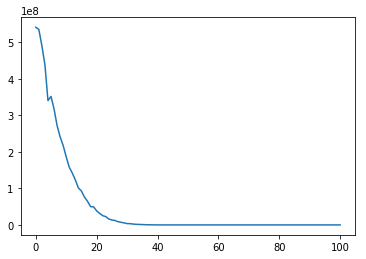

In [39]:
PlotCost(historicBestScore)

In [40]:
historicBest

[('[0, 3, 0, 3, 5, 3, 0, 1, 1, 4, 2, 0, 1, 2, 4, 0, 1, 2, 0, 0, 0, 0, 3, 3, 2, 4, 0, 1, 4, 3, 3, 5, 0, 2, 3, 4, 0, 1, 1, 4, 5, 1, 1, 0, 1, 0, 3, 2, 1, 1, 5, 3, 3, 1, 0, 5, 3, 5, 3, 1, 4, 3, 1, 0, 0, 2, 0, 3, 0, 5, 1, 5, 1, 2, 4, 2, 1, 3, 1, 3, 1, 4, 0, 2, 5, 2, 2, 4, 0, 4, 0, 4, 2, 4, 1, 1, 1, 1, 3, 1, 3, 0, 5, 4, 4, 0, 3, 5, 2, 0, 0, 0, 0, 1, 3, 0, 0, 4, 2, 0, 2, 0, 5, 2, 2, 2, 2, 0, 3, 3, 0, 5, 4, 1, 4, 4, 2, 3, 5, 4, 0, 4, 0, 0, 1, 0, 4, 1, 1, 3, 0, 1, 5, 3, 0, 1, 4, 4, 1, 3, 5, 5, 5, 4, 2, 0, 1, 5, 0, 4, 2, 1, 3, 1, 1, 0, 0, 5, 4, 2, 2, 0, 4, 0, 3, 2, 0, 2, 4, 5, 2, 0, 5, 0, 1, 0, 0, 3, 3, 4, 4, 3, 5, 5, 2, 0, 3, 0, 5, 2, 0, 0, 3, 4, 4, 0, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 0, 1, 5, 4, 0, 2, 4, 3, 1, 0, 5, 1, 0, 0, 1, 0, 1, 1, 0, 5, 1, 0, 3, 5, 3, 4, 5, 5, 1, 2, 0, 5, 1, 4]',
  541556157.0),
 ('[0, 3, 0, 1, 5, 3, 0, 3, 0, 4, 0, 0, 0, 2, 4, 1, 1, 2, 0, 2, 0, 1, 5, 4, 2, 4, 0, 1, 4, 1, 1, 5, 1, 5, 3, 4, 3, 1, 2, 4, 5, 5, 1, 0, 3, 0, 3, 2, 1, 4, 5, 4, 4, 1, 3, 2, 0, 5, 0, 1, 1, 3, 4, 0, 5,

In [51]:
historicBestScore

[541556157.0,
 535502099.0,
 490934316.0,
 438820390.0,
 340594949.0,
 351998363.0,
 317690724.0,
 271910803.0,
 241015755.0,
 217244673.0,
 186245501.0,
 157884269.0,
 141954829.0,
 122990801.0,
 101224979.0,
 92771348.0,
 76173616.0,
 64733865.0,
 50060620.0,
 49469053.0,
 38517145.0,
 31470949.0,
 25306336.0,
 22728233.0,
 16132485.0,
 13633549.0,
 12063460.0,
 8922964.0,
 7097473.0,
 5606648.0,
 3629816.0,
 3364328.0,
 2340392.0,
 1627688.0,
 1268184.0,
 972376.0,
 585688.0,
 384872.0,
 262928.0,
 88592.0,
 14152.0,
 9832.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 400.0,
 

In [54]:
lol = historicBestScore.index(min(historicBestScore))

In [55]:
print(lol)

42


In [57]:
bestScore = historicBest[lol][0]

In [58]:
bestScore

'[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'

In [ ]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

In [70]:
def Destring(string):
    string = string.replace("[", "")
    string = string.replace("]", "")
    string = string.split(",")
    string = list(map(int, string))

    return string

In [71]:
lolol = Destring(bestScore)

In [72]:
print(lolol)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
bestsolution = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
df_menu = df["Item"]

In [80]:
df["Solution"] = lolol

In [85]:
solution_df = df[df.Solution>=1]

In [86]:
solution_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Solution
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,10,4,17,2,14,8,0,25,10,1
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,14,3,12,4,19,15,8,20,20,1
30,Breakfast,Big Breakfast with Egg Whites (Large Biscuit),10.1 oz (286 g),690,370,41.0,63,14.0,72,0.0,...,18,4,17,4,26,4,2,10,15,1
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,38,7,28,18,35,4,2,25,30,1
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,...,22,4,15,16,36,8,25,30,15,1


In [87]:
sol_list = solution_df["Solution"].tolist()

In [88]:
item_list = solution_df["Item"].tolist()

In [91]:
print(str(sol_list[1]) + " " + str(item_list[1]))

1 Bacon, Egg & Cheese Biscuit (Large Biscuit)


In [97]:
def printmenu(solution, items):
    for i in range (len(solution)):
        print(str(solution[i]) + " " + (items[i]))

In [98]:
printmenu(sol_list, item_list)

1 Sausage McMuffin
1 Bacon, Egg & Cheese Biscuit (Large Biscuit)
1 Big Breakfast with Egg Whites (Large Biscuit)
1 Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)
1 Bacon Clubhouse Crispy Chicken Sandwich
1 Bacon Clubhouse Grilled Chicken Sandwich
1 Sprite (Large)
1 Regular Iced Coffee (Small)
1 French Vanilla Iced Coffee (Small)
1 Frappé Chocolate Chip (Small)


In [ ]:
np.array(df_item)[bestsolution]

In [ ]:
df_item[bestsolution]